In [1]:
import time 
import datetime 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import linregress

In [2]:
# Initialize a list of tickers for the stock
tickers = ["DAL", "AAL", "JETS"]

#Define the variables
precovid_date = int(time.mktime(datetime.datetime(2015, 1, 1, 23, 59).timetuple()))
postcovid_date = int(time.mktime(datetime.datetime(2023, 1, 1, 23, 59).timetuple()))
interval = "1wk"

# Initialize an empty list to store the dataframes for each stock
dfs = []

# Fetch the data for each stock and store it in the dfs list
for ticker in tickers:
    query_string = f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={precovid_date}&period2={postcovid_date}&interval={interval}&events=history&includeAdjustedClose=true"
    df = pd.read_csv(query_string)
    df['Ticker'] = ticker
    df['Date'] = pd.to_datetime(df['Date'])  # Convert Date to datetime format
    dfs.append(df)

# Concatenate all the dataframes in the dfs list based on the common "Date" column
combined_df = pd.concat(dfs)

# Calculate Daily Trade Value for each stock
combined_df['Daily Trade Value'] = combined_df['Close'].astype(float) * combined_df['Volume'].astype(float)

# Rearrange columns with "Ticker" as the first column
combined_df = combined_df[['Ticker'] + [col for col in combined_df.columns if col != 'Ticker']]

#Change Datetime to Type Integer
combined_df['Date'] = pd.to_datetime(combined_df['Date']).astype(np.int64)

combined_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Daily Trade Value
0,DAL,1420070400000000000,49.919998,50.009998,46.250000,46.970001,42.189480,42590400.0,2.000471e+09
1,DAL,1420675200000000000,47.480000,48.500000,44.470001,45.310001,40.698418,56548300.0,2.562204e+09
2,DAL,1421280000000000000,45.090000,49.599998,44.610001,49.180000,44.174541,57643900.0,2.834927e+09
3,DAL,1421884800000000000,49.930000,51.060001,48.279999,48.459999,43.527828,53395000.0,2.587522e+09
4,DAL,1422489600000000000,48.669998,50.349998,44.810001,46.959999,42.180489,77611600.0,3.644641e+09
...,...,...,...,...,...,...,...,...,...
397,JETS,1670198400000000000,18.690001,18.969999,17.920000,18.110001,18.110001,13696800.0,2.480491e+08
398,JETS,1670803200000000000,18.100000,19.150000,17.260000,17.450001,17.450001,19994100.0,3.488971e+08
399,JETS,1671408000000000000,17.469999,17.635000,16.840000,17.230000,17.230000,13120100.0,2.260593e+08
400,JETS,1672012800000000000,17.073999,17.163000,16.580000,17.080000,17.080000,12371800.0,2.113103e+08


In [3]:
#Save combined_df as csv 
FilePath = "outsource_data.csv"
combined_df.to_csv(FilePath)

In [4]:
#Define a function for making scatter plot pre-cvoid
def precovid(x_values, y_values, ticker, title=''):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    plt.scatter(x_values, y_values, alpha=0.3)
    plt.grid(which='both', axis='both')

    plt.plot(x_values, regress_values, color='r')

    plt.annotate(f"y={slope: .2f}x + {intercept: .2f}", (0,10), color='r')
    
    plt.xticks([])
    
    plt.xlabel('2015 to 2019')
    plt.ylabel('Volume')
    plt.title(title)

    #plt.savefig(f"output_data/PreCovid_{ticker}.png")
    plt.show()
    
    print(f"The r-value is: {r_value}")

In [5]:
#Define a function for making scatter plot post-covid
def postcovid(x_values, y_values, ticker, title=''):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    plt.scatter(x_values, y_values, alpha=0.3)
    plt.grid(which='both', axis='both')

    plt.plot(x_values, regress_values, color='r')

    plt.annotate(f"y={slope: .2f}x + {intercept: .2f}", (0,10), color='r')
    
    plt.xticks([])
    
    plt.xlabel('2020 to Present')
    plt.ylabel('Volume')
    plt.title(title)
    
    #plt.savefig(f"output_data/PosCovid_{ticker}.png")
    plt.show()
    
    print(f"The r-value is: {r_value}")

In [6]:
#Define dataframes for pre/post covid per ticker

#precovid
precovid_jets = combined_df[(combined_df['Ticker']=='JETS') & (combined_df['Date'].values <= 1577750400000000000)] 
precovid_dal = combined_df[(combined_df['Ticker']=='DAL') & (combined_df['Date'].values <= 1577750400000000000)] 
precovid_aal = combined_df[(combined_df['Ticker']=='AAL') & (combined_df['Date'].values <= 1577750400000000000)] 

#postcovid
postcovid_jets = combined_df[(combined_df['Ticker'] == 'JETS')&(combined_df['Date'].values>=1577836800000000000)]
postcovid_dal = combined_df[(combined_df['Ticker'] == 'DAL')&(combined_df['Date'].values>=1577836800000000000)]
postcovid_aal = combined_df[(combined_df['Ticker'] == 'AAL')&(combined_df['Date'].values>=1577836800000000000)]


### Linear Regression Scatter Plots on Tickers PreCovid

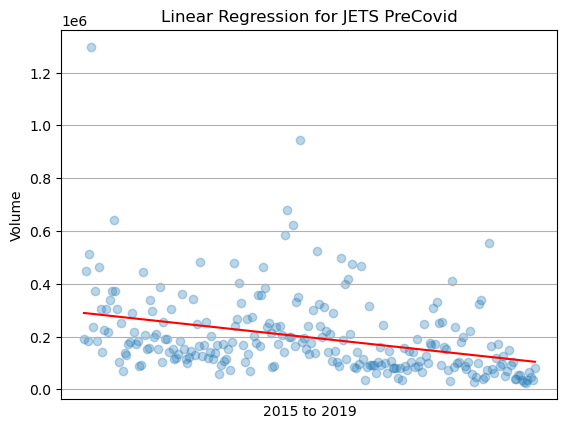

The r-value is: -0.35037419289338634


In [7]:
precovid(precovid_jets['Date'], precovid_jets['Volume'], "JETS", title='Linear Regression for JETS PreCovid')


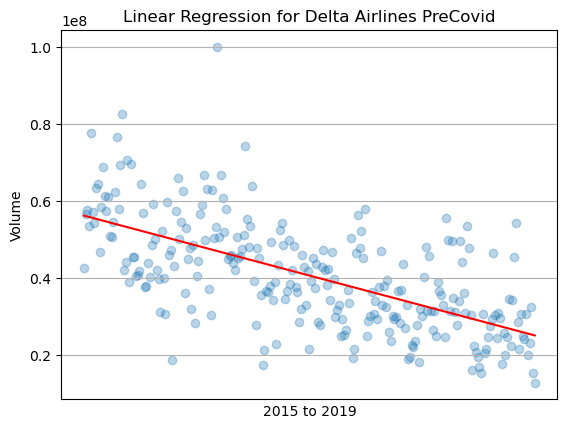

The r-value is: -0.6377969213249919


In [8]:
precovid(precovid_dal['Date'], precovid_dal['Volume'], "DAL", title='Linear Regression for Delta Airlines PreCovid')


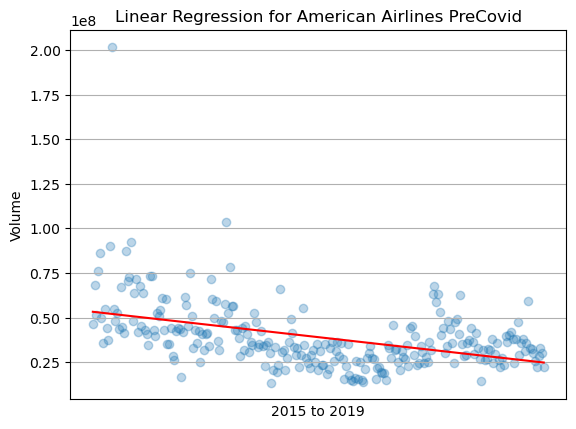

The r-value is: -0.44166434174075997


In [9]:
precovid(precovid_aal['Date'], precovid_aal['Volume'], "AAL", title='Linear Regression for American Airlines PreCovid')


### Post Coivd Ticker Linear Regression Graphs

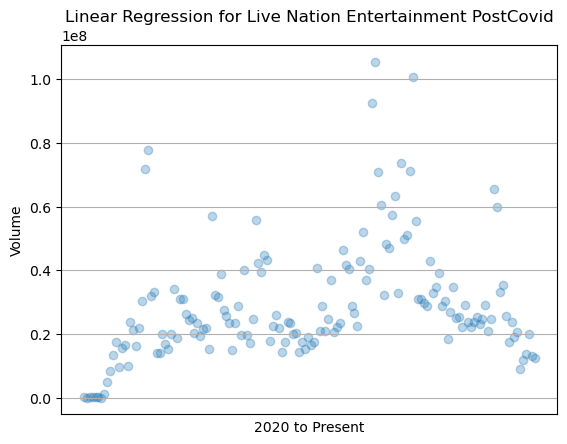

The r-value is: nan


In [11]:
postcovid(postcovid_jets['Date'], postcovid_jets['Volume'], "JETS", title='Linear Regression for Live Nation Entertainment PostCovid')


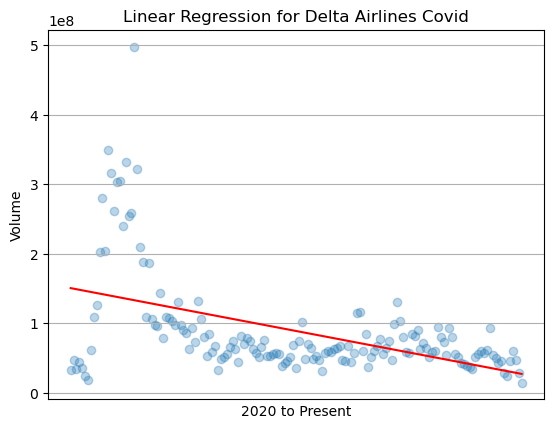

The r-value is: -0.4839522370678828


In [12]:
postcovid(postcovid_dal['Date'], postcovid_dal['Volume'], "DAL", title='Linear Regression for Delta Airlines Covid')


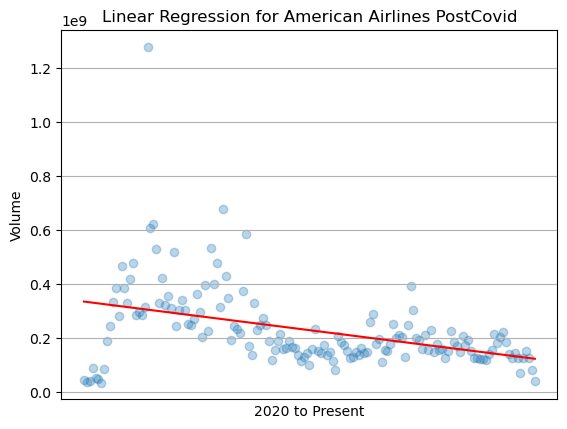

The r-value is: -0.4150009737669756


In [13]:
postcovid(postcovid_aal['Date'], postcovid_aal['Volume'], "AAL", title='Linear Regression for American Airlines PostCovid')
